# How to train a neural network to recognise, differentiate and classify different images.

###### A walkthrough of how to set up, train, test and evaluate the performance of a machine learning pipeline on a given dataset.

----

## Abstract
In this tutorial we will look at convolutional nerual networks, why they are useful, when we would use them and how to implement a simple pipeline using Pytorch. We will explore the steps taken when setting up the pipleline and the thought process behind each decision. We will, set up, train, test and evaluate the performance of the deployed neural network. We will be using the Fashion-MNIST image dataset for this tutorial which includes 60000 images separated into 10 different classes with an approximately 85%/15% training/testing dataset split (60000 training images and 10000 testing images). To do this we will be making use of, the Pytorch, TorchVision, Matplotlib numpy libraries as well as some others.

---

## Learning objectives

In this tutorial we will learn:

- What a Convolutional Nerual Network is
- Why we use them
- How to set them up
- How to train them
- How to test them
- How to evaluate them
- How different hyper-parameters affect the outcome

---

## Table of Contents <a class="anchor" id="table_of_contents"></a>
* [Chapter 1 - Introduction](#chapter1)
    * [What are Neural Networks?](#section_1_1)
    * [What is a Convolutional Neural Network?](#section_1_2)
    * [How do they work?](#section_1_3)
        * [Convolutional Layer](#sub_section_1_3_1)
        * [Rectified Linear Unit (ReLU)](#sub_section_1_3_2)
        * [Pooling Layer](#sub_section_1_3_3)
        * [Fully-connected Layer](#sub_section_1_3_4) 
* [Chapter 2 - The "How To"](#chapter2)
    * [Implementation](#section_2_1)
        * [Imports](#sub_section_2_1_1)
        * [The Dataset](#sub_section_2_1_2)
        * [The Neural Network](#sub_section_2_1_3)
        * [Initialisation](#sub_section_2_1_4)
        * [Training & Testing Loop](#sub_section_2_1_5)
* [Chapter 3 - Evaluation](#chapter3)
    * [Evaluating the performance of our neural network](#section_3_1)
        * [Example Results](#sub_section_3_1_2)
* [Chapter 4 - Conclusion](#chapter4)
* [Chapter 5 - References](#chapter5)

---

## Chapter 1 - Introduction <a class="anchor" id="chapter1"></a>

[Back to top](#table_of_contents)

---
### 1.1 What are Neural Networks? <a class="anchor" id="section_1_1"></a>
Neural networks are a part of machine learning, and are at the core deep learning alogorithms used today. Their general make-up constitutes of node layers, which are made of an input layer, hidden layer(s) and an output layer. Each node is connected to another and holds a weight and threshold with it. A node becomes active once the threshold is reached by the output for any other node. Otherwise, no data is passed along.

---

### 1.2 What is a Convolutional Neural Network? <a class="anchor" id="section_1_2"></a>

As per the definition from IMB, a convolutional neural network are neural networks that:
>"use three-dimensional data for image classification and object recognition tasks." (IBM, 2023)

Given this with CNNs we can see superior peformance when compared to other neural networks when working with speech, image and audio singal inputs and as such allows CNNs to be able to tackle several applications. Additionally, compared to other ANNs, CNNs tend to boast the capability of being able to share information between layers, all of which contributes to a CNNs ability to perform to a high accuracy in various machine learning tasks.

Conversely, they tend to be harder to determine an optimal iteration count for, they require a higher computational cost and thus are susceptible to information loss, are quite large and complex thus are quite time-consuming and laborious to design (from scratch) due to their knowledge requirement.

---

### 1.3 How do they work? <a class="anchor" id="section_1_3"></a>

CNNs are a type of feed-forward neural network (describes the flow of information between it's layers) where neurons are tiled in a way such that they respond to regions that are overlapping in the visual field. 

CNNs are generally made up of three main components:
- The Convolutional layer(s)
- The Pooling layer(s)
- and the Fully connected layer(s)

--- 

#### 1.3.1 Convolutional Layer <a class="anchor" id="sub_section_1_3_1"></a>

These act as feature extractors.

In this layer the neural network takes the input, and applies a filter (or kernal) to it to form a feature map.

The input is usually given in three-dimensions; height, width and 'depth' which in image processing is given in terms of the colour channels. The filter (in the form of an array of weights) is typically a 3x3 matrix which is applied to an area of the image and a dot product operation is formed between the input pixels and the filter which is then fed into an output array which eventually becomes the feature map. Some hyperparameters can be defined here which in turn also affect the size of the output (feature map), and these are:
- The number of filters used
- The stride (number of pixels moved by the filter per operation)
- and the padding (which is used typically when the filter does not fit the input image).

We can compute the size of the output before actually performing any operations using the following formula: 

$ ((W - F + 2(P))/S)+1 $

where:

- W is the size of the input,
- F is the size of the filter/kernel,
- S is the stride taken by the filter,
- and P is the padding applied to the input.


After each convolution operation non-linearity operation is performed on the output, this is usually a Rectified Linear Unit (ReLU).

---

#### 1.3.2 Rectified Linear Unit (ReLU) <a class="anchor" id="sub_section_1_3_2"></a>

Given as the function:

$ f(x) = max(x,0) $

and is always used between applications of convolutional layers.

This function provides us with typically faster and easier computations as well as a faster time for convergence when compared to other functions such as a sigmoid or hyperbolic tangents.

Additionally it has the added benefit of a lower probability of a vanishing gradient. 
>"a phenomenon that occurs during the training of deep neural networks, where the gradients that are used to update the network become extremely small or "vanish" as they are backpropogated from the output layers to the earlier layers" (Engati, n.d.)

Conversely, a disadvantage of this function is that it is suspect to the Dying ReLU (where a neuron outputs 0 for data in the training set), however there are solutions to this such as the Parametric or Randomised ReLU.

---

#### 1.3.3 Pooling Layer <a class="anchor" id="sub_section_1_3_3"></a>


Alternatively refered to as downsampling is the layer in which dimensionality reduction (reduction of perameters) on the input occurs. In this layer, an unweighted filter is scanned across the input and an aggregation function is applied to these values instead.

There are two types used:

- Max Pooling, where the highest input within the filtered is passed into the downsampled array
- and Average Pooling where the average within the filter is calculated and then passed into the downsampled array.

A large amount of information is typically lost in this layer, however it helps to reduce complexity, improves efficiency and reduce the risk of overfitting.

An added benefit of downsampling is the ability to look at more of an image since it is smaller.

Pooling layers also improves transitional invariance (ability to accurately classify an image despite movement of object within the input).

---

#### 1.3.4 Fully-connected Layer <a class="anchor" id="sub_section_1_3_4"></a>

Put simply, this layer performs the task of classifying an input based on the features extracted from previous layers and the different filters applied throughout. Unlike the convolutional and pooling layers the FC layers usually make use of a Softmax function to classify inputs, producing a probability of either 0 or 1.

---

## Chapter 2 - The "How To" <a class="anchor" id="chapter2"></a>

[Back to top](#table_of_contents)

### 2.1 Implementation <a class="anchor" id="section_2_1"></a>
---
#### 2.1.1 Imports <a class="anchor" id="sub_section_2_1_1"></a>
We can begin by importing the libraries we need to create our neural network, the main ones being:
- numpy,
- torch (Pytorch),
- torch.nn (Pytorch Neural Network module)
- torchvision (Pytorch TorchVision library)
- matplotlib

---



In [1]:
# Importing libraries for numerical operations, data manipulation, and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing PyTorch for building and training neural networks
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

# Importing torchvision for computer vision tasks
import torchvision
import torchvision.transforms as transforms

# Importing scikit-learn for machine learning metrics and evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Checking if CUDA (GPU computing support) is available
if torch.cuda.is_available():
    # If CUDA is available, assign the device to GPU ("cuda:0")
    device = torch.device("cuda:0")
else:
    # If CUDA is not available, assign the device to CPU
    device = torch.device("cpu")
    
# Cited sources:
# pytorch (n.d.). CUDA semantics — PyTorch 1.13 documentation. [online] pytorch.org. Available at: https://pytorch.org/docs/stable/notes/cuda.html.

Convolutional Neural Nets may see a performance increase if a dedicated NVIDIA GPU is available for use on and a Pytorch package installed with CUDA support is available. Thus, the following line checks to see if this is the case, otherwise it will use the CPU.

In [3]:
# Importing the FashionMNIST dataset from torchvision.datasets
# It will automatically download the dataset if not already available
# The dataset will be saved in the "./data" directory
# The dataset will be transformed to tensors using transforms.ToTensor()
# This converts the PIL Image to a tensor of shape (C x H x W) in the range [0, 1]
train_set = torchvision.datasets.FashionMNIST(
    "./data",         
    download=True,    
    transform=transforms.Compose([   
        transforms.ToTensor()  
    ])
)

# Loading the FashionMNIST test set
# Setting train=False ensures we load the test set
# It also applies the same transformations as the train set
test_set = torchvision.datasets.FashionMNIST(
    "./data",         
    download=True,    
    train=False,
    transform=transforms.Compose([
        transforms.ToTensor()         
    ])
)

# Cited sources:
# pytorch (n.d.). Datasets — Torchvision 0.15 documentation. [online] pytorch.org. Available at: https://pytorch.org/vision/stable/datasets.html.
# pytorch (n.d.). FashionMNIST — Torchvision 0.17 documentation. [online] pytorch.org. Available at: 
# https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST [Accessed 20 Mar. 2024].

----

#### 2.1.2 The Dataset <a class="anchor" id="sub_section_2_1_2"></a>

We initialise some variables using the following functions which access the Pytorch APIs that are responsible for handling requests for the datasets that they hold.

These functions will download their respective training and testing datasets in their respective variables while applying a transformation to change them from Python Image Library (PIL) images to workable Tensors.

Note: You may see a:

>Files already downloaded and verified

if the machine being used has downloaded the dataset to this location previously. (e.g. this notebook is run more than once)

In [4]:
# Creating a data loader for the training set
# DataLoader wraps the training set, providing access to batches of data
# batch_size=100 specifies the number of samples in each batch
train_loader = torch.utils.data.DataLoader(
    train_set, 
    batch_size=100 
)

# Creating a data loader for the test set
test_loader = torch.utils.data.DataLoader(
    test_set,      
    batch_size=100
)

# Cited sources:
# Same as above

We also initialise some loading variables which will deliver training and testing images in batches for the neural net to make use of.

In [5]:
def output_label(label):
    # Dictionary mapping integer labels to class names
    output_mapping = {
        0: "T-shirt/Top", 1: "Trouser", 2: "Pullover", 3: "Dress", 
        4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 
        9: "Ankle Boot"
    }
    # If the input label is a PyTorch tensor, convert it to a Python scalar
    if isinstance(label, torch.Tensor):
        label = label.item()
    # Return the corresponding class name from the dictionary
    return output_mapping[label]

# Cited sources:
# zalandoresearch (2020). zalandoresearch/fashion-mnist. [online] GitHub. Available at: https://github.com/zalandoresearch/fashion-mnist.
# https://github.com/aliabbasjaffri/fashion-mnist-metaflow-bentoml-pipeline/blob/main/datasource.py

Here we define a function to output the labels which may be represented as numbers in the dataset and return this as a mapping to English for human readability.

9


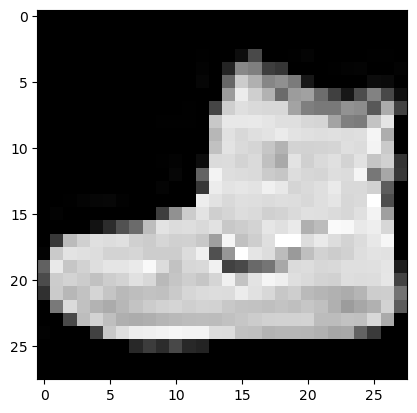

In [6]:
# Load a single image and its label from the training set
image, label = next(iter(train_set))

# Display the image using Matplotlib's imshow() function
# 'image.squeeze()' removes any single-dimensional entries from the shape of the array
# This is done because FashionMNIST images are grayscale, so they have a single channel
plt.imshow(image.squeeze(), cmap="gray")

print(label)

We can print an example image of one of the items in the dataset and the associated number label. 

The one pictured above is a gray colourmap of an Ankle boot in the dataset.

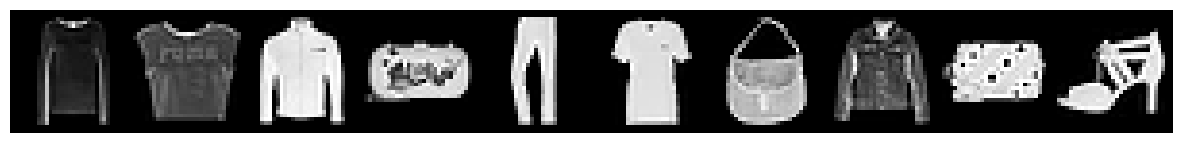

Labels: Pullover, T-shirt/Top, Coat, Bag, Trouser, T-shirt/Top, Bag, Coat, Bag, Sandal, 

In [7]:
# Create a data loader with shuffling enabled, a batch size of 10, and using the training set
demo_loader = torch.utils.data.DataLoader(
    train_set,   
    shuffle=True, 
    batch_size=10 
)

# Retrieve a batch of data from the data loader
batch = next(iter(demo_loader))
images, labels = batch

# Create a grid of images for visualization using torchvision.utils.make_grid()
grid = torchvision.utils.make_grid(images, nrow=10)

# Plot the grid of images
plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))  # Transpose the grid for proper visualization
plt.axis('off')  # Turn off axis labels and ticks for better visualization
plt.show()

# Print the labels associated with the images in the batch
print("Labels:", end=" ")

# Iterate over the labels and print their corresponding class names using the output_label() function
for label in labels:
    print(output_label(label), end=", ")


# Sources cited:
# https://deeplizard.com/learn/video/mUueSPmcOBc

Additionally, by initialising a "demo_loader" batch we can load a shuffled (random) batch of items from the training set and print them with their associated English labels. 

----

#### 2.1.3 The Neural Network <a class="anchor" id="sub_section_2_1_3"></a>

In [8]:
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        
        # Define the convolutional feature extraction layers
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),  # 1 input channel, 32 output channels, 3x3 kernel, padding=1
            nn.BatchNorm2d(32),                           # Batch normalization after the convolutional layer
            nn.ReLU(),                                   # ReLU activation function
            nn.MaxPool2d(kernel_size=2, stride=2),       # Max pooling layer with 2x2 kernel and stride of 2
            nn.Conv2d(32, 64, kernel_size=3),             # 32 input channels, 64 output channels, 3x3 kernel
            nn.BatchNorm2d(64),                           # Batch normalization
            nn.ReLU(),                                   
            nn.MaxPool2d(2)                              # Max pooling with 2x2 kernel and default stride of 2
        )
        
        # Define the fully connected classifier layers
        self.classifier = nn.Sequential(
            nn.Linear(64 * 6 * 6, 600),                   # Fully connected layer with 64*6*6 input features and 600 output features
            nn.Dropout(0.25),                            # Dropout layer with dropout probability of 25%
            nn.ReLU(),                                   # ReLU activation
            nn.Linear(600, 120),                         
            nn.ReLU(),                                   
            nn.Linear(120, 10)                           # Fully connected layer with 120 input features and 10 output features (class scores)
        )
        
    def forward(self, x):
        # Forward pass through the network
        x = self.features(x)           # Pass input through feature extraction layers
        x = x.view(x.size(0), -1)      # Flatten the output tensor from convolutional layers
        x = self.classifier(x)         # Pass flattened tensor through classifier layers
        return x                       # Return the output for each class

# Sources cited:
# https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
# https://medium.com/analytics-vidhya/a-simple-neural-network-classifier-using-pytorch-from-scratch-7ebb477422d2


We begin by initialising a class which will act as the entire neural network passing through Pytorch's Neural Network module as a parameter such that we can access all of its functions.

Then we define its functions, init (essentially properties of the network) and a forward pass function

The init function contains two convolutional filters, two ReLU activation functions and two MaxPool functions to make up our "sandwich"

We also have normalisation functions to normalise the photos once their features are extracted.

We also define the fully connected layers in the "self.classifier" which condenses all the features as so 2304 -> 600 -> 120 -> 10.

We also include a dropout function to reduce the risk of our neural network overfitting to the training dataset.

Lastly, the forward pass function activates both "self.features" and "self.classifier" passing the images through them both to arrive at a classification for the image that it is currently seeing and then returns that value.

---

#### 2.1.4 Initialisation <a class="anchor" id="sub_section_2_1_4"></a>

In [9]:
# Initialize the model and move it to the specified device (GPU or CPU)
model = FashionCNN().to(device)

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define learning rate
learning_rate = 0.001

# Define the optimizer (Stochastic Gradient Descent)
# It optimizes the parameters of the model (weights and biases) with the specified learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Alternatively, you can use the Adam optimizer, which is a variant of stochastic gradient descent
# It often converges faster than traditional SGD and adapts the learning rate for each parameter
# Uncomment the following line to use Adam optimizer instead of SGD
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Sources cited:
# https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
# https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD.step
# https://medium.com/analytics-vidhya/a-simple-neural-network-classifier-using-pytorch-from-scratch-7ebb477422d2

Now that our neural network and its functions are defined we can initialise the model by assigning it to a variable and assigning the model to the available device (cuda or cpu) applying a loss function, learning rate and an optimisation function both provided by Pytorch

I have concluded in my testing of this network that the stochastic gradient descent optimisation function is not very good at providing the model with very good accuracy over a low number of epochs (~5 epochs).

Using an optimisation function such as the Adam optimisation function will see greater accuracy over the same number of epochs, however.

As per this quote from Kaggle, this observation holds true

>SGD is simple but effective, while Adam and RMSprop may be more computationally intensive but often converge faster. They are all gradient descent-based algorithms, meaning they iteratively update the model weights in the direction that reduces the loss. (kaggle.com, n.d.)

---

#### 2.1.5 Training & Testing Loop <a class="anchor" id="sub_section_2_1_5"></a>

In [10]:
# Set the number of epochs for training
num_epochs = 5

# Initialize lists to store loss, iteration, and accuracy values for plotting
loss_list = []
iteration_list = []
accuracy_list = []

# Loop over each epoch
for epoch in range(num_epochs):
    # Loop over each batch in the training DataLoader
    for i, (images, labels) in enumerate(train_loader):
        # Move images and labels to the specified device (GPU or CPU)
        images, labels = images.to(device), labels.to(device)
        
        # Zero the gradients accumulated by the optimizer
        optimizer.zero_grad()
        
        # Forward pass: compute predicted outputs by passing inputs through the model
        outputs = model(images)
        
        # Compute the loss
        loss = criterion(outputs, labels)
        
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        
        # Update model parameters (weights and biases)
        optimizer.step()

        # Calculate training iteration count
        count = epoch * len(train_loader) + i + 1

        # Print validation accuracy and loss every 50 training steps
        if count % 50 == 0:
            total = 0
            correct = 0

            # Evaluate model on the test dataset
            with torch.no_grad():
                for images, labels in test_loader:
                    images, labels = images.to(device), labels.to(device)
                    outputs = model(images)
                    _, predicted = torch.max(outputs, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            # Calculate accuracy
            accuracy = 100 * correct / total

            # Append loss and accuracy values to the lists for plotting
            loss_list.append(loss.item())
            iteration_list.append(count)
            accuracy_list.append(accuracy)

            # Print training progress
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%')

# Print a message indicating that training has finished
print("Finished.")

# Sources cited:
# https://medium.com/analytics-vidhya/a-simple-neural-network-classifier-using-pytorch-from-scratch-7ebb477422d2
# https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

Epoch [1/5], Step [50/600], Loss: 2.2606, Accuracy: 19.37%
Epoch [1/5], Step [100/600], Loss: 2.2061, Accuracy: 26.16%
Epoch [1/5], Step [150/600], Loss: 2.1609, Accuracy: 34.01%
Epoch [1/5], Step [200/600], Loss: 2.1096, Accuracy: 40.96%
Epoch [1/5], Step [250/600], Loss: 2.0109, Accuracy: 46.44%
Epoch [1/5], Step [300/600], Loss: 1.9447, Accuracy: 49.79%
Epoch [1/5], Step [350/600], Loss: 1.8971, Accuracy: 51.43%
Epoch [1/5], Step [400/600], Loss: 1.8341, Accuracy: 53.18%
Epoch [1/5], Step [450/600], Loss: 1.7885, Accuracy: 53.91%
Epoch [1/5], Step [500/600], Loss: 1.7062, Accuracy: 55.78%
Epoch [1/5], Step [550/600], Loss: 1.5376, Accuracy: 57.22%
Epoch [1/5], Step [600/600], Loss: 1.4619, Accuracy: 59.69%
Epoch [2/5], Step [50/600], Loss: 1.4004, Accuracy: 62.17%
Epoch [2/5], Step [100/600], Loss: 1.3641, Accuracy: 64.02%
Epoch [2/5], Step [150/600], Loss: 1.3330, Accuracy: 65.92%
Epoch [2/5], Step [200/600], Loss: 1.2960, Accuracy: 67.57%
Epoch [2/5], Step [250/600], Loss: 1.1126,

Here we can begin the training and testing loops on our neural network over a defined number of epochs which can take quite a while ~20 mins for 20 epochs depending on which optimisation function is used.

I used the SDG optimisation function when I recorded the 20 minute approximation.

We iterate through from 0 (or) 1 epochs through to the value held by num_epochs and feed images to our neural network from our training data loader making sure to use the device parameter to make use of whichever device is available.

The gradient for the optimiser function is initially zeroed (shouldn't really matter whether is is done at the start or end of this loop), we then apply the model to the current batch of images, calulate our loss given the prediction and the true class, then backpropagate this loss value and iterate the optimiser to update the gradient for the neurons.

We increment the count and if it reaches a multiple of 50 we pass into the if statement and take a fresh measurement of the accuracy of the neural network at this point in time and add it to the previously initialised arrays to use to plot our findings later on.

Lastly we produce a status message to update the user followed by a finished message once the train/test loop is fully complete.

---

## Chapter 3 <a class="anchor" id="chapter3"></a>

[Back to top](#table_of_contents)

---

### 3.1 Evaluating the performance of our neural network <a class="anchor" id="section_3_1"></a>

We can simply produce the accuracy value of the network as a whole per x number of iterations, as done in the train/test loop but popular conventions for visualising nerual network performance involve plotting the loss value and accuracy values against that of the number of iterations/epochs that have passed.

This is what we will do for this pipeline.

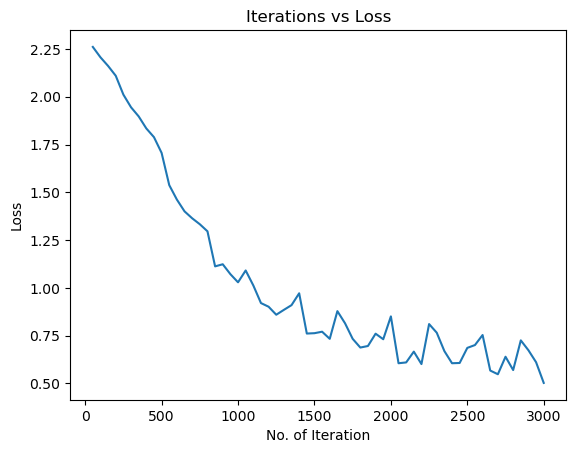

In [19]:
# Plot the loss values against the number of iterations
plt.plot(iteration_list, loss_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

# Sources cited
# (Specifically for the types of graphs I chose to use) https://towardsdatascience.com/useful-plots-to-diagnose-your-neural-network-521907fa2f45
# https://matplotlib.org/stable/tutorials/pyplot.html


While depending on the parameters used by whoever may read this will affect the appearance of the graph above, provided that the parameters used are not too extreme, one should observe a general downward trend suggesting that the nerual network is improving with it's classification of objects.

Through some research the spikes may be attributed to 

>In the case of deep neural networks, this can occur due to the exploding/vanishing gradient.

which possibly could be further mitigated by reducing the weights held by neurons, shuffling training data or reducing the learning rate.

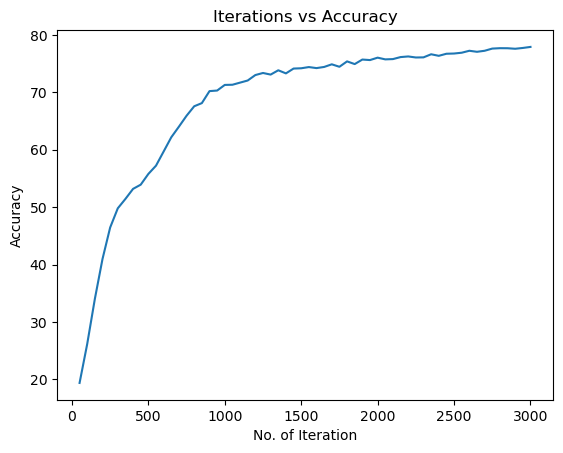

In [20]:
# Plot the accuracy values against the number of iterations
plt.plot(iteration_list, accuracy_list)

plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy")
plt.show()

# Sources cited:
# same as above

The claim made above is further reinforced by the appearance of the Iterations vs Accuracy graph pictured above which shows an overall upward trend in classification accuracy over time.

In [21]:
# Initialize lists to store predicted and true labels
predictions_list = []
labels_list = []

# Disable gradient calculation for evaluation
with torch.no_grad():
    # Iterate over batches in the test DataLoader
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        predictions_list.extend(predicted.cpu().numpy())  # Append predicted labels to the predictions list
        labels_list.extend(labels.cpu().numpy())          # Append true labels to the labels list

# Source cited:
# https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

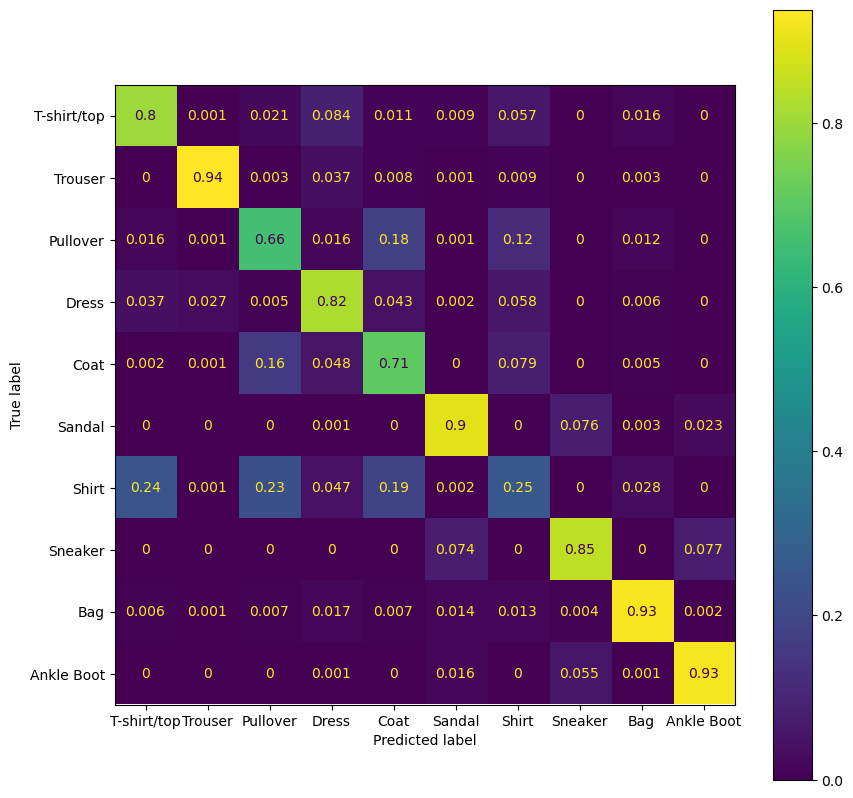

In [22]:
# Compute the confusion matrix using scikit-learn's confusion_matrix function
cm = confusion_matrix(labels_list, predictions_list, normalize='true')

# Hard-coded classes for easy plotting (don't have to manage variables passed through network)
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')
# Create a ConfusionMatrixDisplay object with the confusion matrix and class labels
cmp = ConfusionMatrixDisplay(cm, display_labels=classes)

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax)
plt.show()

# Sources cited:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

Finally we use a confusion matrix to show us where and how the neural network may be mis-classifying objects that it is seeing.

Interestingly, enough if this notebook is run with it's default settings (the same may hold true even if you increase the number of epochs for example), the net has the most trouble correctly classifying "shirts" and most often confuses them with "T-shirts" suggesting that after 5 epochs it seems to make predictions based on the shape of the object as the main differentiating features hence why it may be confusing shirts with any other sleeved object (t-shirts, pullovers and coats).

Conversely, this mis-classification applies to the other "sleeved" items with network having less issue with correctly classifying trousers, sandals, bags and ankle boots. (Ankle boots and sneakers can look quite similar in my opinion)

---

### 3.1.2 Example Results <a class="anchor" id="sub_section_3_1_2"></a>

### My results using SGD + Cross Entropy Loss (5 epochs, 100 batch size, 0.001 learning rate):

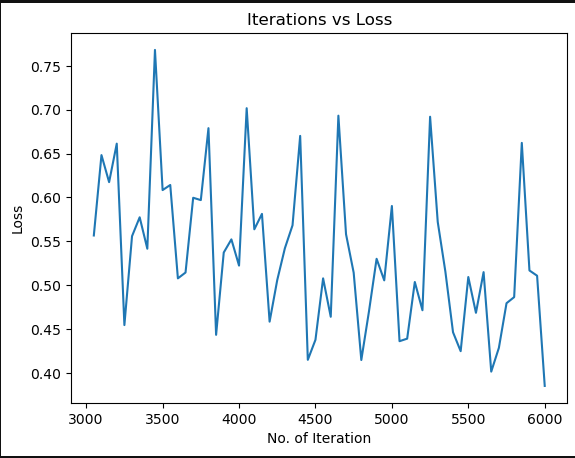

#### (Iteration vs Loss)

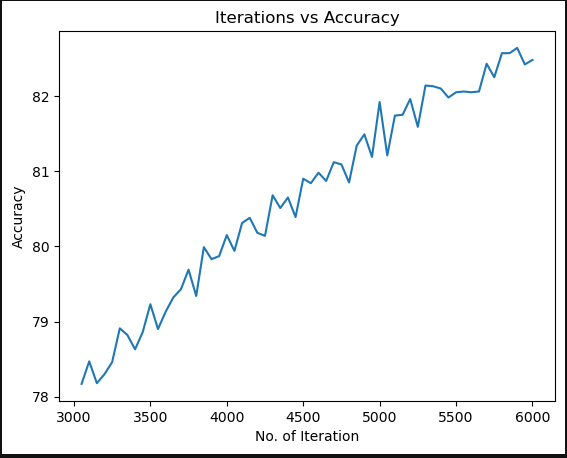

#### (Iteration vs Accuracy)

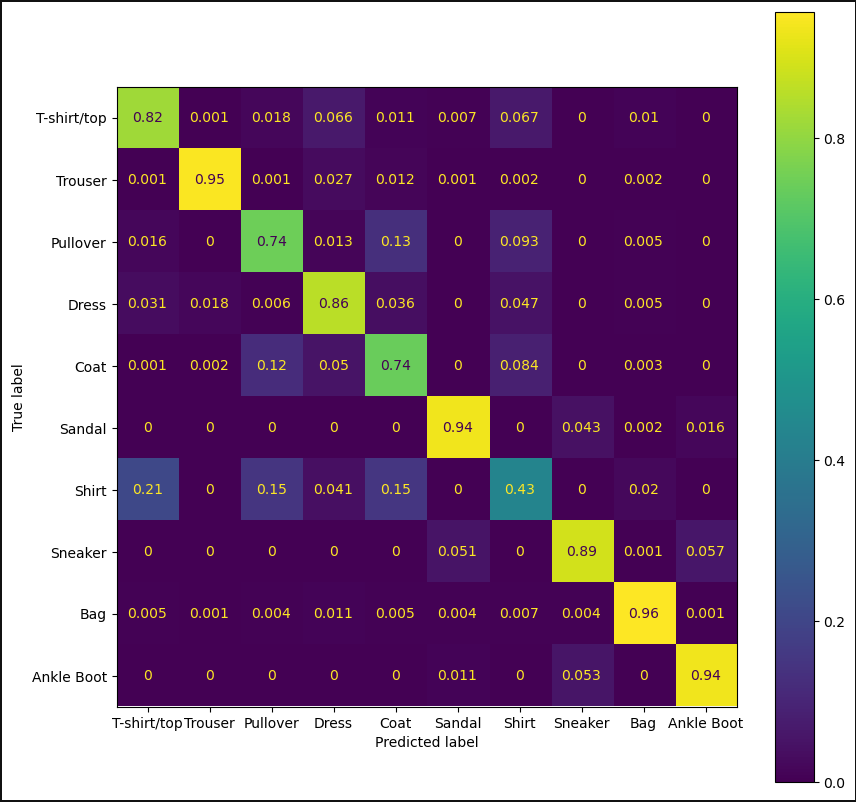

#### Confusion Matrix

---

### My results using SGD + Cross Entropy Loss (20 epochs, 100 batch size, 0.001 learning rate):

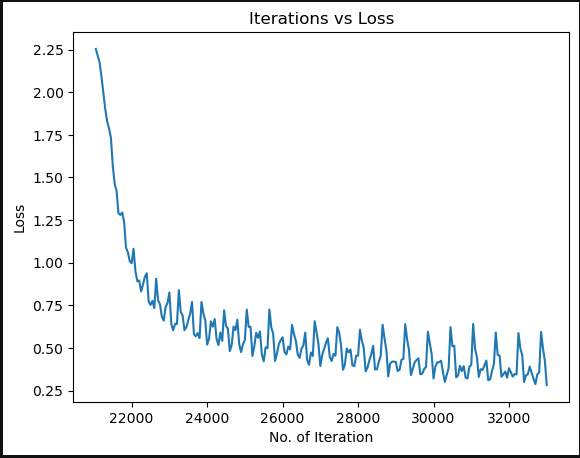

#### (Iteration vs Loss)

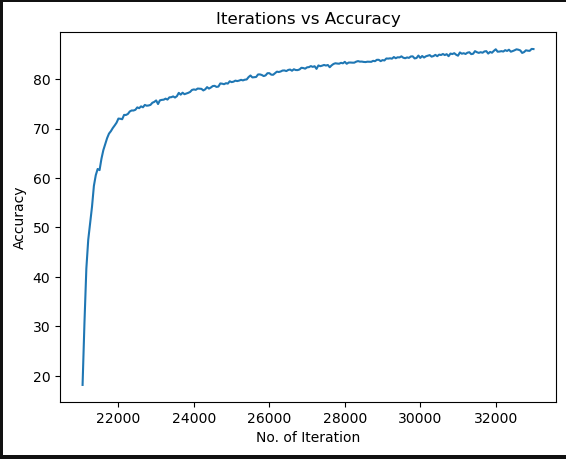

#### (Iteration vs Accuracy)

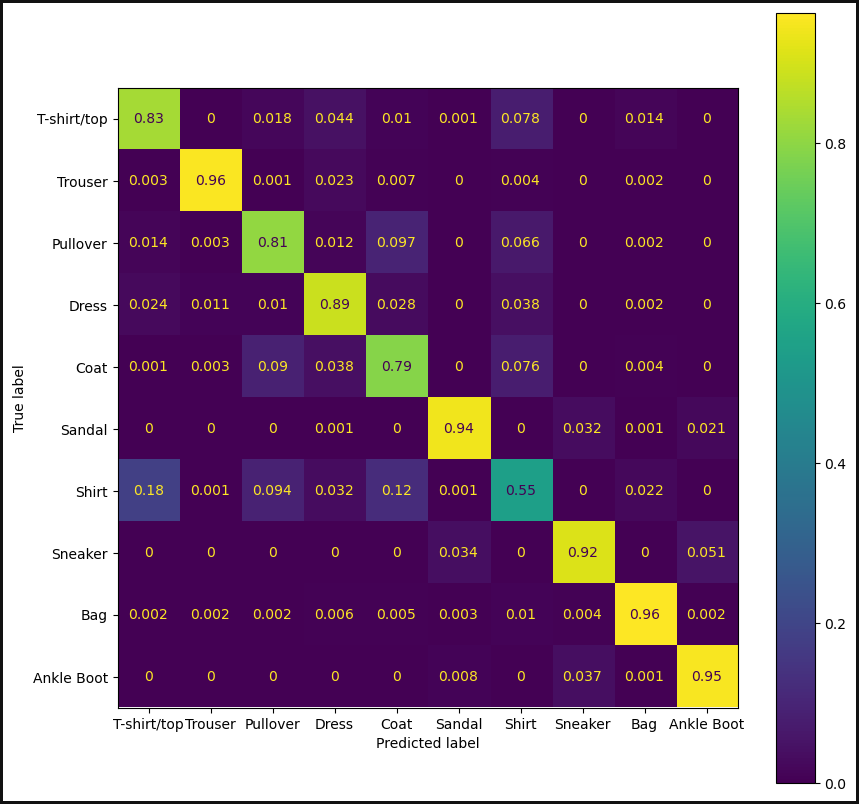

#### Confusion Matrix

---

### My results using SGD + Cross Entropy Loss (5 epochs, 100 batch size, 0.01 learning rate):

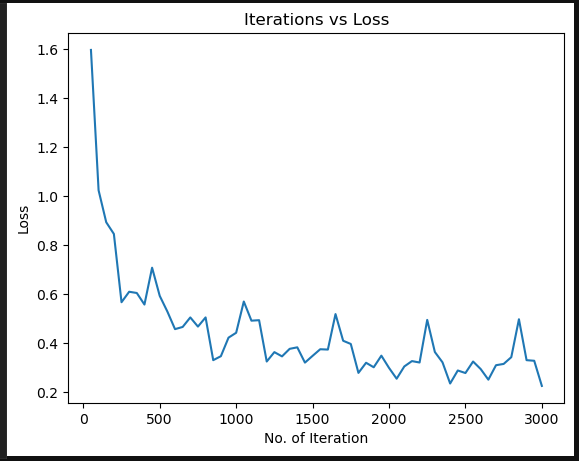

#### (Iteration vs Loss)

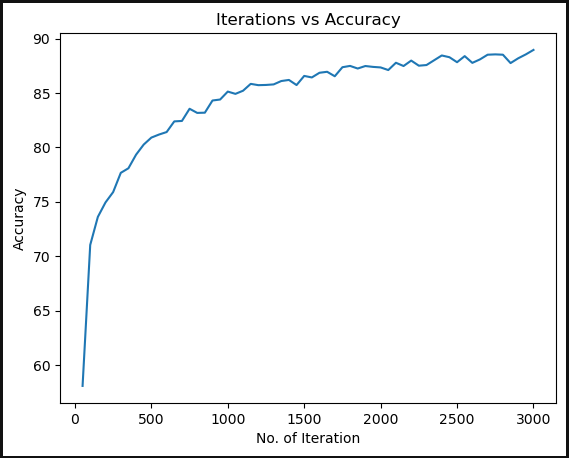

#### (Iteration vs Accuracy)

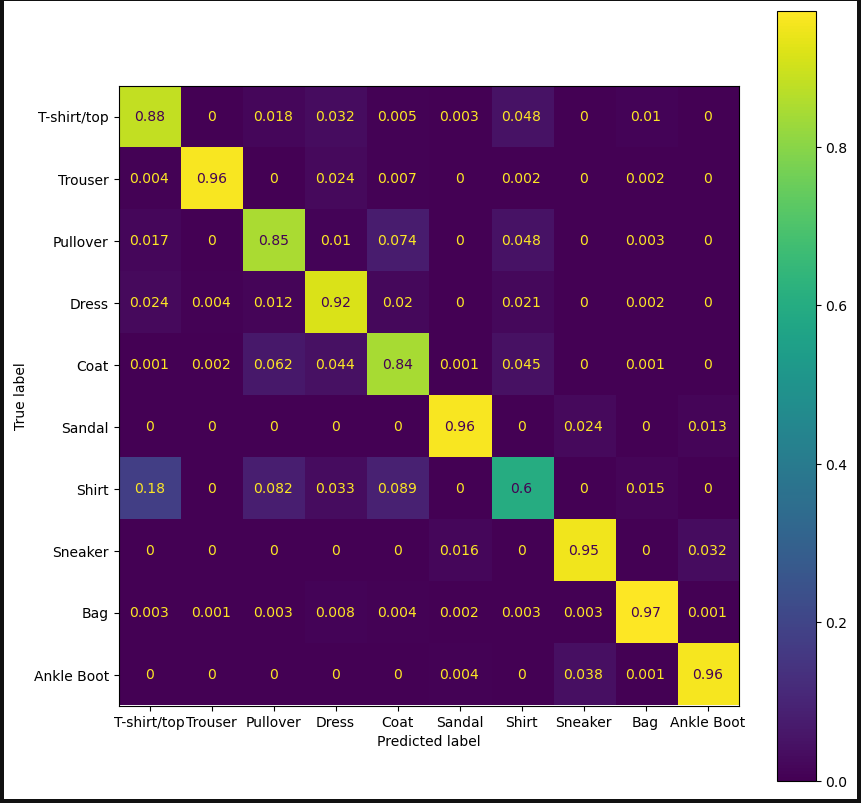

#### Confusion Matrix

---

### My results using SGD + Cross Entropy Loss (5 epochs, 150 batch size, 0.001 learning rate):

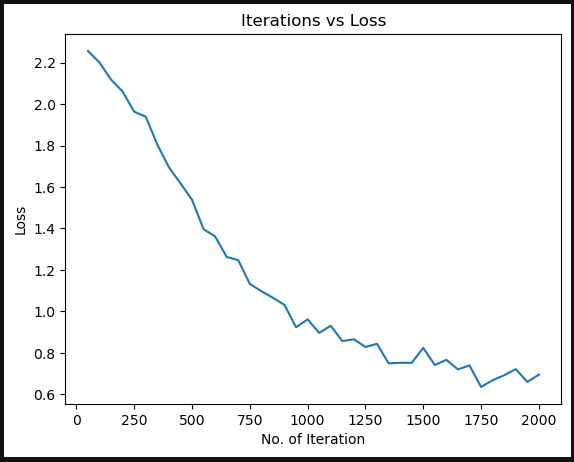

#### (Iteration vs Loss)

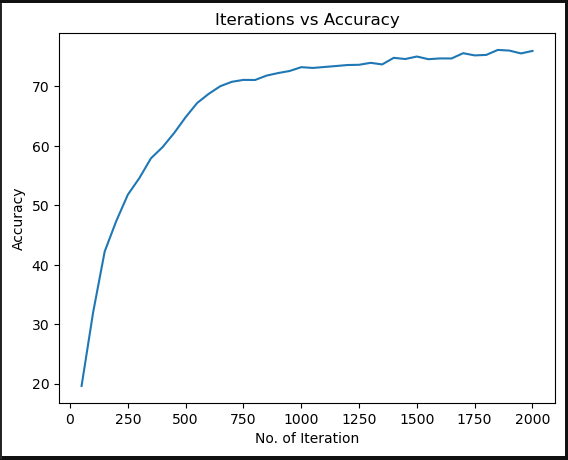

#### (Iteration vs Accuracy)

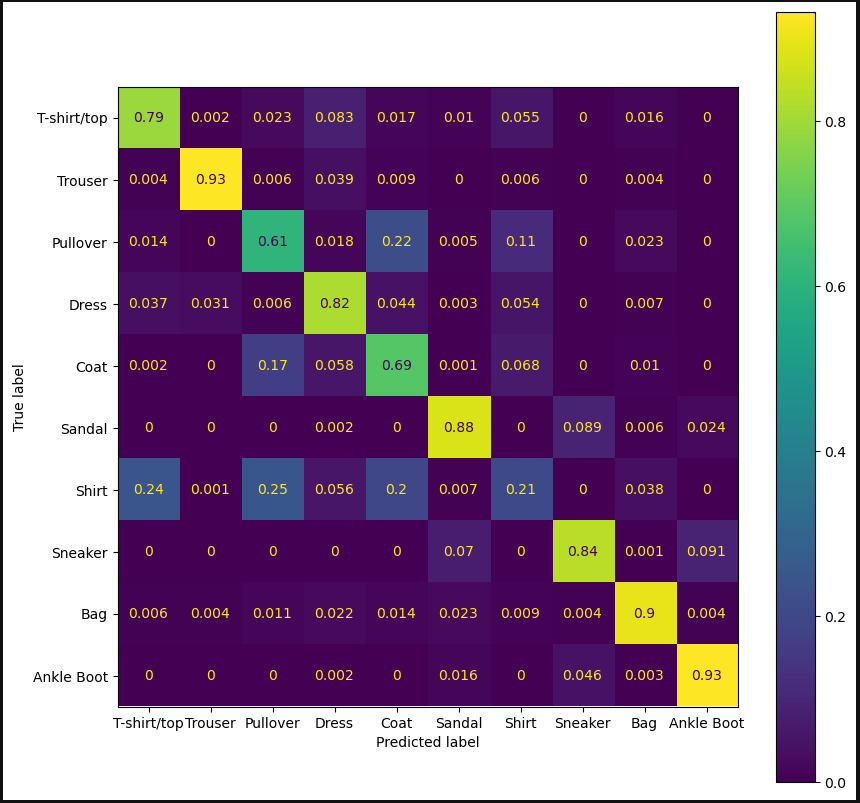

#### Confusion Matrix

Evidently, the accuracy of our neural network is limited by it's ability to distinguish shirts from other similar objects.

---

## Chapter 4 - Conclusion <a class="anchor" id="chapter4"></a>

[Back to top](#table_of_contents)

In this tutorial we learned, what a Convolutional Nerual Network is, why we use them, how to set them up, train them and test them, how to evaluate their performance using graphs, and how different hyper-parameters may affect the performance of the network.

---

## Chapter 5 - References <a class="anchor" id="chapter5"></a>

[Back to top](#table_of_contents)

Artificial Intelligence Stack Exchange. (n.d.). What is the ‘dropout’ technique? [online] Available at: https://ai.stackexchange.com/questions/40/what-is-the-dropout-technique [Accessed 20 Mar. 2024].

Bernecker, C. (2023). How to create a confusion matrix in PyTorch. [online] Medium. Available at: https://christianbernecker.medium.com/how-to-create-a-confusion-matrix-in-pytorch-38d06a7f04b7 [Accessed 20 Mar. 2024].

commonmark.org. (n.d.). Markdown Reference. [online] Available at: https://commonmark.org/help/.

Cristina, S. (2022). Plotting the Training and Validation Loss Curves for the Transformer Model - MachineLearningMastery.com. MachineLearningMastery.com. [online] 18 Oct. Available at: https://machinelearningmastery.com/plotting-the-training-and-validation-loss-curves-for-the-transformer-model/.

Cross Validated. (n.d.). neural networks - Explanation of Spikes in training loss vs. iterations with Adam Optimizer. [online] Available at: https://stats.stackexchange.com/questions/303857/explanation-of-spikes-in-training-loss-vs-iterations-with-adam-optimizer.

Engati. (n.d.). Vanishing gradient problem. [online] Available at: https://www.engati.com/glossary/vanishing-gradient-problem#:~:text=exploding%20gradient%20problem%3F-.

GeeksforGeeks. (2023). How to Add a Table of Contents in the Jupyter Notebook. [online] Available at: https://www.geeksforgeeks.org/how-to-add-a-table-of-contents-in-the-jupyter-notebook/ [Accessed 20 Mar. 2024].

Hannan Satopay (2019). The Ultimate Markdown Guide (for Jupyter Notebook) - Analytics Vidhya - Medium. [online] Medium. Available at: https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd.

IBM (2023). What are Convolutional Neural Networks? | IBM. [online] www.ibm.com. Available at: https://www.ibm.com/topics/convolutional-neural-networks.

Jason Brownlee (2019). Understand the Impact of Learning Rate on Neural Network Performance. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/.

Jose, G.V. (2019). Useful Plots to Diagnose your Neural Network. [online] Medium. Available at: https://towardsdatascience.com/useful-plots-to-diagnose-your-neural-network-521907fa2f45.

kaggle.com. (n.d.). Intuitive Explanation of SGD, Adam, and RMSProp. [online] Available at: https://www.kaggle.com/code/harpdeci/intuitive-explanation-of-sgd-adam-and-rmsprop [Accessed 20 Mar. 2024].

Krishnamurthy, B. (2022). ReLU Activation Function Explained | Built In. [online] builtin.com. Available at: https://builtin.com/machine-learning/relu-activation-function.

Kuriakose, J. (2022). A Simple Neural Network Classifier using PyTorch, from Scratch. [online] Analytics Vidhya. Available at: https://medium.com/analytics-vidhya/a-simple-neural-network-classifier-using-pytorch-from-scratch-7ebb477422d2 [Accessed 20 Mar. 2024].

LEIFUER (n.d.). Intro-to-PyTorch: Loading Image Data. [online] kaggle.com. Available at: https://www.kaggle.com/code/leifuer/intro-to-pytorch-loading-image-data [Accessed 20 Mar. 2024].

matplotlib (n.d.). matplotlib.axes.Axes.set_xlim — Matplotlib 3.8.2 documentation. [online] matplotlib.org. Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html.

matplotlib (n.d.). matplotlib.pyplot.axhline — Matplotlib 3.6.0 documentation. [online] matplotlib.org. Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html.

matplotlib (n.d.). Pyplot tutorial — Matplotlib 3.8.0 documentation. [online] matplotlib.org. Available at: https://matplotlib.org/stable/tutorials/pyplot.html.

ml-cheatsheet.readthedocs.io. (2017). Loss Functions — ML Glossary documentation. [online] Available at: https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html.

Nutan (2022). Training an Image Classifier in Pytorch. [online] Medium. Available at: https://medium.com/@nutanbhogendrasharma/training-an-image-classifier-in-pytorch-417f6f1cb7f8 [Accessed 20 Mar. 2024].

pytorch (n.d.). Automatic Differentiation with torch.autograd — PyTorch Tutorials 2.2.1+cu121 documentation. [online] pytorch.org. Available at: https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html [Accessed 20 Mar. 2024].

pytorch (n.d.). Build the Neural Network — PyTorch Tutorials 1.10.0+cu102 documentation. [online] pytorch.org. Available at: https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html.

pytorch (n.d.). Conv2d — PyTorch 1.10.1 documentation. [online] pytorch.org. Available at: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html.

pytorch (n.d.). CrossEntropyLoss — PyTorch 1.6.0 documentation. [online] pytorch.org. Available at: https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html.

pytorch (n.d.). Datasets — Torchvision 0.15 documentation. [online] pytorch.org. Available at: https://pytorch.org/vision/stable/datasets.html.

pytorch (n.d.). Deep Learning with PyTorch: A 60 Minute Blitz — PyTorch Tutorials 1.6.0 documentation. [online] pytorch.org. Available at: https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html.

pytorch (n.d.). FashionMNIST — Torchvision 0.17 documentation. [online] pytorch.org. Available at: https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST [Accessed 20 Mar. 2024].

pytorch (n.d.). Linear — PyTorch 1.10 documentation. [online] pytorch.org. Available at: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear.

pytorch (n.d.). Models and pre-trained weights — Torchvision 0.17 documentation. [online] pytorch.org. Available at: https://pytorch.org/vision/stable/models.html#classification [Accessed 20 Mar. 2024].

pytorch (n.d.). no_grad — PyTorch 2.2 documentation. [online] pytorch.org. Available at: https://pytorch.org/docs/stable/generated/torch.no_grad.html [Accessed 20 Mar. 2024].

pytorch (n.d.). Normalize — Torchvision main documentation. [online] pytorch.org. Available at: https://pytorch.org/vision/main/generated/torchvision.transforms.Normalize.html.

pytorch (n.d.). PyTorch. [online] www.pytorch.org. Available at: https://pytorch.org conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia.

pytorch (n.d.). Quickstart — PyTorch Tutorials 1.11.0+cu102 documentation. [online] pytorch.org. Available at: https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html.

pytorch (n.d.). ReLU — PyTorch 1.8.0 documentation. [online] pytorch.org. Available at: https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html.

pytorch (n.d.). ReLU — PyTorch 2.0 documentation. [online] pytorch.org. Available at: https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU.

pytorch (n.d.). SGD — PyTorch 2.2 documentation. [online] pytorch.org. Available at: https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD.step [Accessed 20 Mar. 2024].

pytorch (n.d.). torch.nn — PyTorch 2.1 documentation. [online] pytorch.org. Available at: https://pytorch.org/docs/stable/nn.html#convolution-layers.

pytorch (n.d.). torch.nn — PyTorch master documentation. [online] pytorch.org. Available at: https://pytorch.org/docs/stable/nn.html.

pytorch (n.d.). torch.optim — PyTorch master documentation. [online] pytorch.org. Available at: https://pytorch.org/docs/stable/optim.html#algorithms.

pytorch (n.d.). torch.utils.data — PyTorch 2.2 documentation. [online] pytorch.org. Available at: https://pytorch.org/docs/stable/data.html#dataset-types [Accessed 20 Mar. 2024].

pytorch (n.d.). torchvision — Torchvision master documentation. [online] pytorch.org. Available at: https://pytorch.org/vision/stable/index.html.

pytorch (n.d.). torchvision.models — Torchvision 0.10.0 documentation. [online] pytorch.org. Available at: https://pytorch.org/vision/stable/models.html.

pytorch (n.d.). torchvision.transforms — Torchvision master documentation. [online] pytorch.org. Available at: https://pytorch.org/vision/stable/transforms.html.

pytorch (n.d.). torchvision.utils — Torchvision master documentation. [online] pytorch.org. Available at: https://pytorch.org/vision/0.9/utils.html [Accessed 20 Mar. 2024].

pytorch (n.d.). ToTensor — Torchvision main documentation. [online] pytorch.org. Available at: https://pytorch.org/vision/main/generated/torchvision.transforms.ToTensor.html.

pytorch (n.d.). Training a Classifier — PyTorch Tutorials 1.5.0 documentation. [online] pytorch.org. Available at: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html.

scikit-learn (2019). sklearn.metrics.confusion_matrix — scikit-learn 0.21.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html.

Stack Overflow. (n.d.). Adjust size of ConfusionMatrixDisplay (ScikitLearn). [online] Available at: https://stackoverflow.com/questions/66483409/adjust-size-of-confusionmatrixdisplay-scikitlearn [Accessed 20 Mar. 2024].

Stack Overflow. (n.d.). How can I plot pytorch tensor? [online] Available at: https://stackoverflow.com/questions/68629652/how-can-i-plot-pytorch-tensor [Accessed 20 Mar. 2024].

Stack Overflow. (n.d.). How to Plot Confusion Matrix in PyTorch? [online] Available at: https://stackoverflow.com/questions/74020233/how-to-plot-confusion-matrix-in-pytorch [Accessed 20 Mar. 2024].

Stack Overflow. (n.d.). Why there’s a big jump (up) of the loss curve during the training? [online] Available at: https://stackoverflow.com/questions/58633177/why-theres-a-big-jump-up-of-the-loss-curve-during-the-training [Accessed 20 Mar. 2024].

zalandoresearch (2020). zalandore

GitHub. (n.d.). fashion-mnist-metaflow-bentoml-pipeline/datasource.py at main · aliabbasjaffri/fashion-mnist-metaflow-bentoml-pipeline. [online] Available at: https://github.com/aliabbasjaffri/fashion-mnist-metaflow-bentoml-pipeline/blob/main/datasource.py#%20Load%20a%20single%20image%20and%20its%20label%20from%20the%20training%20setimage [Accessed 20 Mar. 2024].

deeplizard (n.d.). PyTorch Datasets and DataLoaders - Training Set Exploration for Deep Learning and AI. [online] deeplizard.com. Available at: https://deeplizard.com/learn/video/mUueSPmcOBc [Accessed 20 Mar. 2024].

T, D. (2019). Confusion Matrix Visualization. [online] Medium. Available at: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea.

“DQNAS: Neural Architecture Search Using Reinforcement Learning.” Typeset.io, 16 Jan. 2023, typeset.io/papers/dqnas-neural-architecture-search-using-reinforcement-1f19afb7, https://doi.org/10.48550/arxiv.2301.06687. Accessed 20 Mar. 2024.

Hsia, Shih-Chang, et al. “Convolution Neural Network with Low Operation FLOPS and High Accuracy for Image Recognition.” Journal of Real-Time Image Processing, vol. 18, no. 4, 19 June 2021, https://doi.org/10.1007/s11554-021-01140-9. Accessed 22 June 2021.

“SqueezeVGGNet: A Methodology for Designing Low Complexity VGG Architecture for Resource Constraint Edge Applications.” Typeset.io, 2022 20th IEEE Interregional NEWCAS Conference (NEWCAS), 19 June 2022, typeset.io/papers/squeezevggnet-a-methodology-for-designing-low-complexity-vgg-2cq8qxq8. Accessed 20 Mar. 2024.

Yang, Rui, et al. “Multilayer Extreme Learning Convolutional Feature Neural Network Model for the Weak Feature Classification and Status Identification of Planetary Bearing.” Journal of Sensors, vol. 2022, 10 Jan. 2022, pp. 7693393:1–7693393:11, typeset.io/papers/multilayer-extreme-learning-convolutional-feature-neural-2lt8kki4, https://doi.org/10.1155/2022/7693393. Accessed 20 Mar. 2024.search/fashion-mnist. [online] GitHub. Available at: https://github.com/zalandoresearch/fashion-mnist.

---